/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.11.0-CAPI-1.17.0). Conversions between both will be slow.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/osmnx/projection.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/mi

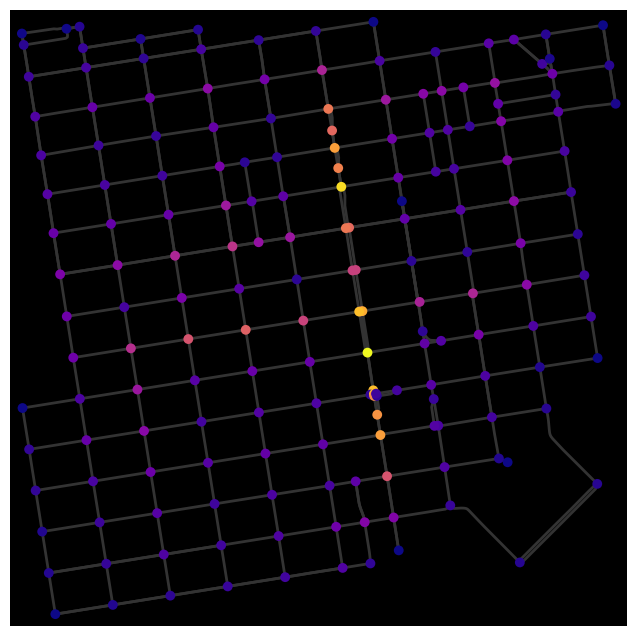

/opt/conda/lib/python3.9/site-packages/osmnx/io.py:87: UserWarning: The `save_graph_shapefile` function is deprecated and will be removed in a future release. Instead, use the `save_graph_geopackage` function to save graphs as GeoPackage files for subsequent GIS analysis.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/osmnx/io.py:114: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)
/opt/conda/lib/python3.9/site-packages/osmnx/io.py:115: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_edges.to_file(filepath_edges, driver="ESRI Shapefile", index=True, encoding=encoding)


In [1]:
import networkx as nx
import osmnx as ox

ox.config(use_cache=True, log_console=True)

# download street network data from OSM and construct a MultiDiGraph model
G = ox.graph_from_point((37.79, -122.41), dist=750, network_type="drive")

# impute edge (driving) speeds and calculate edge traversal times
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

# you can convert MultiDiGraph to/from geopandas GeoDataFrames
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
G = ox.graph_from_gdfs(gdf_nodes, gdf_edges, graph_attrs=G.graph)

# convert MultiDiGraph to DiGraph to use nx.betweenness_centrality function
# choose between parallel edges by minimizing travel_time attribute value
D = ox.utils_graph.get_digraph(G, weight="travel_time")

# calculate node betweenness centrality, weighted by travel time
bc = nx.betweenness_centrality(D, weight="travel_time", normalized=True)
nx.set_node_attributes(G, values=bc, name="bc")

# plot the graph, coloring nodes by betweenness centrality
nc = ox.plot.get_node_colors_by_attr(G, "bc", cmap="plasma")
fig, ax = ox.plot_graph(
    G, bgcolor="k", node_color=nc, node_size=50, edge_linewidth=2, edge_color="#333333"
)

# save graph to shapefile, geopackage, or graphml
ox.save_graph_shapefile(G, filepath="./graph_shapefile/")
ox.save_graph_geopackage(G, filepath="./graph.gpkg")
ox.save_graphml(G, filepath="./graph.graphml")

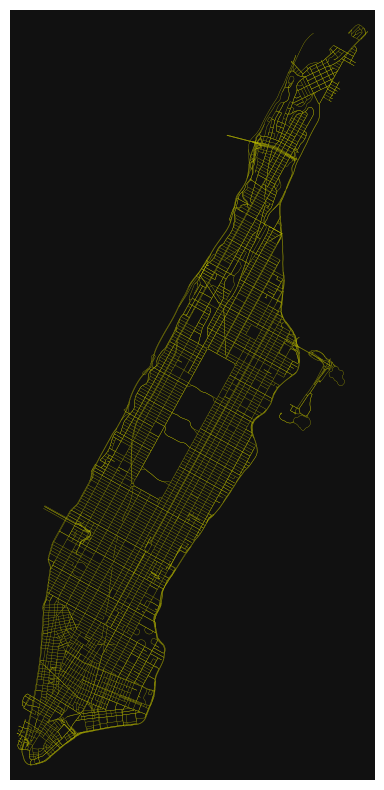

AttributeError: module 'osmnx' has no attribute 'get_nearest_node'

In [2]:
import osmnx as ox
import networkx as nx
from datetime import timedelta


# The place where your 2 points are located. It will be used to create a graph from the OSM data
# In this example, the 2 points are two addresses in Manhattan, so we choose "Manhattan"
# It could be a bounding box too, or an area around a point
graph_area = ("Manhattan, New York, USA")

# Create the graph of the area from OSM data. It will download the data and create the graph
G = ox.graph_from_place(graph_area, network_type='drive')

# OSM data are sometime incomplete so we use the speed module of osmnx to add missing edge speeds and travel times
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)

# Save graph to disk if you want to reuse it
ox.save_graphml(G, "Manhattan.graphml")

# Load the graph
#G = ox.load_graphml("Manhattan.graphml")

# Plot the graph


# Two pairs of (lat,lng) coordinates
origin_coordinates = (40.70195053163349, -74.01123198479581)
destination_coordinates = (40.87148739347057, -73.91517498611597)

ox.plot

# If you want to take an address (osmx will use Nominatim service for this)
# origin_coordinates = ox.geocode("2 Broad St, New York, NY 10005")



In [14]:
# In the graph, get the nodes closest to the points
origin_node = ox.distance.nearest_nodes(G, origin_coordinates[0],origin_coordinates[1])
destination_node = ox.distance.nearest_nodes(G, destination_coordinates[0],destination_coordinates[1])

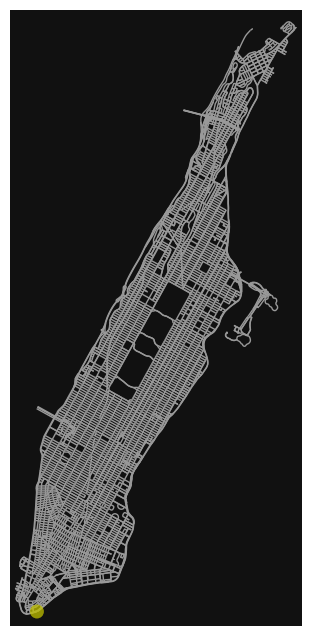

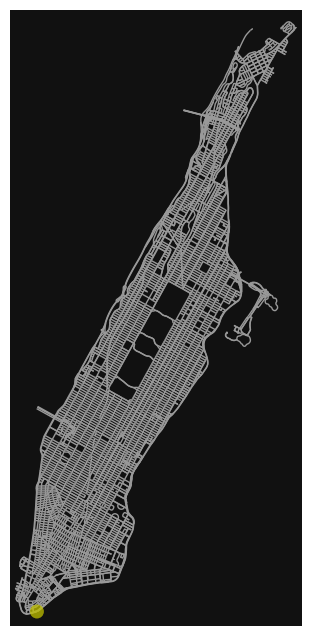

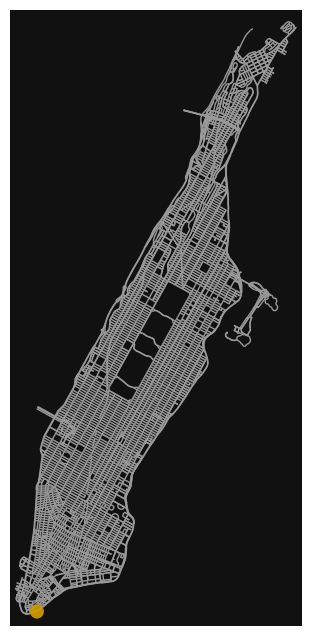

0
0:00:00
0
0.0


In [15]:


# Get the shortest route by distance
shortest_route_by_distance = ox.shortest_path(G, origin_node, destination_node, weight='length')

# Plot the shortest route by distance
fig, ax = ox.plot_graph_route(G, shortest_route_by_distance, route_color='y', route_linewidth=6, node_size=0)

# Get the shortest route by travel time
shortest_route_by_travel_time = ox.shortest_path(G, origin_node, destination_node, weight='length')

# Plot the shortest route by travel time
fig, ax = ox.plot_graph_route(G, shortest_route_by_travel_time, route_color='y', route_linewidth=6, node_size=0)

# Plot the 2 routes
fig, ax = ox.plot_graph_routes(G, routes=[shortest_route_by_distance, shortest_route_by_travel_time], route_colors=['r', 'y'], route_linewidth=6, node_size=0)

# Get the travel time, in seconds
# Note here that we use "nx" (networkx), not "ox" (osmnx)
travel_time_in_seconds = nx.shortest_path_length(G, origin_node, destination_node, weight='travel_time')
print(travel_time_in_seconds)

#The travel time in "HOURS:MINUTES:SECONDS" format
travel_time_in_hours_minutes_seconds = str(timedelta(seconds=travel_time_in_seconds))
print(travel_time_in_hours_minutes_seconds)

# Get the distance in meters
distance_in_meters = nx.shortest_path_length(G, origin_node, destination_node, weight='length')
print(distance_in_meters)
# Distance in kilometers
distance_in_kilometers = distance_in_meters / 1000
print(distance_in_kilometers)

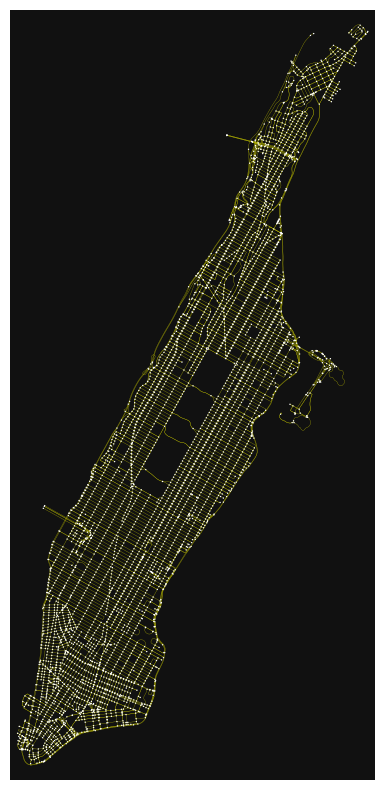

In [16]:
fig, ax = ox.plot_graph(G, figsize=(10, 10), node_size=1, edge_color='y', edge_linewidth=0.2)